In [1]:
import numpy as np
import pandas as pd

np.random.seed(123) # random seed for reproducibility

n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [2]:
n_class_0,n_class_1

(900, 100)

In [7]:
# create df
class_0=pd.DataFrame(
    {
        'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
        'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
        'target':[0]*n_class_0
    }
)

class_1=pd.DataFrame(
    {
        'feature_1':np.random.normal(loc=0,scale=1,size=n_class_1),
        'feature_2':np.random.normal(loc=0,scale=1,size=n_class_1),
        'target':[1]*n_class_1
    }
)

In [8]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df.head()

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0


In [9]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [10]:
# UpSampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [11]:
from sklearn.utils import resample
df_minority_upsmpled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42) 
df_minority_upsmpled.shape

(900, 3)

In [12]:
df_upsampled=pd.concat([df_majority,df_minority_upsmpled])
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [13]:
# downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

df_majority_downsmpled=resample(df_majority,n_samples=len(df_minority),random_state=42) 
df_majority_downsmpled.shape

(100, 3)

In [14]:
df_downsampled=pd.concat([df_majority_downsmpled,df_minority])
df_downsampled.target.value_counts()

target
0    100
1    100
Name: count, dtype: int64

## SMOTE 
-Synthetic Minority Oversampling Technique
- generates synthetic instances of minority class by interpolating btw existing istances

In [17]:
from sklearn.datasets import make_classification
X,y=make_classification(
    n_samples=1000,
    n_features=2,
    n_clusters_per_class=1,
    weights=[0.90],
    random_state=12,
    n_redundant=0
)

In [19]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [20]:
final_df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

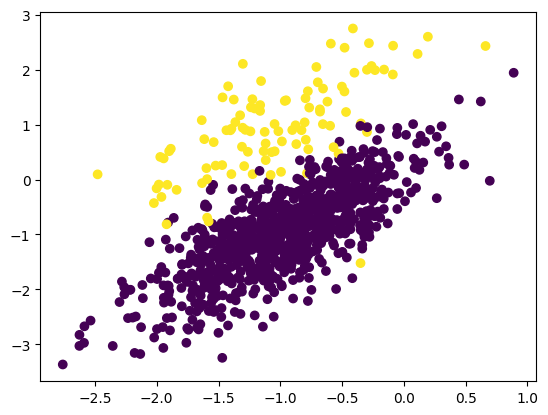

In [21]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [22]:
!pip install imblearn

In [23]:
from imblearn.over_sampling import SMOTE


In [24]:
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [25]:
X.shape

(1800, 2)

In [26]:
y.shape

(1800,)

In [27]:
len(y[y==0])

900

In [28]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])

oversample_df=pd.concat([df1,df2],axis=1)
oversample_df.shape

(1800, 3)

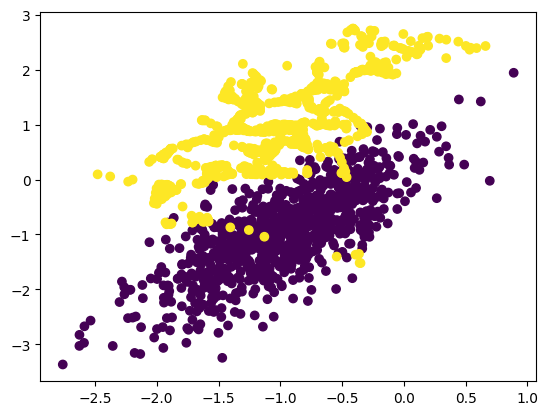

In [29]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])